In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import shutil
import random

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, GlobalMaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

In [17]:
data_dir = '/Users/ferasaltwal/Documents/DSI/New-Capstone/extracted-png-renamed-skull-stripped/train'
categories = ['AD', 'CN']

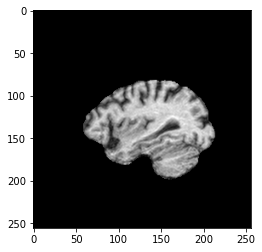

In [32]:
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

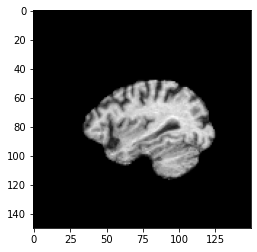

In [34]:
img_size = 150

new_array = cv2.resize(img_array, (img_size, img_size), cv2.IMREAD_GRAYSCALE)
plt.imshow(new_array, cmap='gray')
plt.show()

In [35]:
#adopted from sentdex keras tutuorial
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [36]:
create_training_data()

100%|██████████| 9585/9585 [00:15<00:00, 632.05it/s]


In [108]:
len(training_data)

17679

In [38]:
random.shuffle(training_data)

In [39]:
testing_data = []
testing_dir = '/Users/ferasaltwal/Documents/DSI/New-Capstone/extracted-png-renamed-skull-stripped/test'
def create_testing_data():
    for category in categories:
        path = os.path.join(testing_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_arrray = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_arrray, class_num])
            except Exception as e:
                pass

In [40]:
create_testing_data()

100%|██████████| 426/426 [00:00<00:00, 642.50it/s]


In [13]:
random.shuffle(testing_data)

In [43]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
0
0
0
0


In [44]:
X = []
y = []

In [45]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [46]:
X = X/255

In [47]:
X.shape

(17679, 150, 150, 3)

In [48]:
y = np.array(y)

In [49]:
y.shape

(17679,)

In [50]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(150, 150, 3))

In [51]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [52]:
len(vgg_model.layers)

19

In [53]:
for layers in (vgg_model.layers)[:19]:
    print(layers)
    layers.trainable = False

In [54]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [55]:
model = Sequential()
for layer in vgg_model.layers:
    model.add(layer)

In [56]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [59]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X, y, batch_size=150, epochs = 10, validation_split=0.2)

Epoch 1/10
95/95 [==============================] - 1058s 11s/step - loss: 0.8360 - accuracy: 0.5629 - val_loss: 0.6441 - val_accuracy: 0.6055
Epoch 2/10
95/95 [==============================] - 1084s 11s/step - loss: 0.6415 - accuracy: 0.6311 - val_loss: 0.5910 - val_accuracy: 0.6903
Epoch 3/10
95/95 [==============================] - 1075s 11s/step - loss: 0.6112 - accuracy: 0.6643 - val_loss: 0.7476 - val_accuracy: 0.5645
Epoch 4/10
95/95 [==============================] - 979s 10s/step - loss: 0.5892 - accuracy: 0.6863 - val_loss: 0.5642 - val_accuracy: 0.7005
Epoch 5/10
95/95 [==============================] - 989s 10s/step - loss: 0.5732 - accuracy: 0.6948 - val_loss: 0.5872 - val_accuracy: 0.6722
Epoch 6/10
95/95 [==============================] - 1044s 11s/step - loss: 0.5589 - accuracy: 0.7126 - val_loss: 0.6464 - val_accuracy: 0.6233
Epoch 7/10
95/95 [==============================] - 1020s 11s/step - loss: 0.5468 - accuracy: 0.7159 - val_loss: 0.5760 - val_accuracy: 0.6618
E

In [107]:
# model.save('/Users/ferasaltwal/Documents/DSI/New-Capstone/saved-models/kaggle-jupyter.h5')

### Predictions

In [88]:
X_test = []
y_test = []

In [89]:
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = (np.array(X_test).reshape(-1, img_size, img_size, 3))/255

In [91]:
y_test = np.array(y_test)

In [92]:
print(X_test.shape)
print(y_test.shape)

(2982, 150, 150, 3)
(2982,)


In [93]:
preds = model.predict(X_test)

In [94]:
len(preds)

2982

In [102]:
predictions_AD = []
y_pred = []
for i in preds:
    if i <= 0.50:
        predictions_AD.append('AD')
        y_pred.append(0)
    else:
        predictions_AD.append('CN')
        y_pred.append(1)


In [103]:
predictions_AD.count('AD')

1861

In [104]:
1861/2982

0.6240778001341382

In [105]:
predictions_AD.count('CN')

1121

In [61]:
path_AD_test = '/Users/ferasaltwal/Documents/DSI/New-Capstone/extracted-png_renamed-skull-stripped/test/AD'
path_CN_test = '/Users/ferasaltwal/Documents/DSI/New-Capstone/extracted-png_renamed-skull-stripped/test/CN'

In [79]:
#let's write a function to preprocess new images to feed into the model
def prepare_img(filepath):
    img_size = 150
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return (new_array.reshape(-1, img_size, img_size, 3))/255

In [80]:
pred_list_AD = []
for img in os.listdir(path_AD_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_AD_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_AD.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_AD.append('CN')

In [81]:
len(pred_list_AD)

2556

In [82]:
pred_list_AD.count('AD')

2556

In [83]:
pred_list_CN = []
for img in os.listdir(path_CN_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_CN_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_CN.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_CN.append('CN')

In [85]:
len(pred_list_CN)

426

In [86]:
pred_list_CN.count('CN')

0

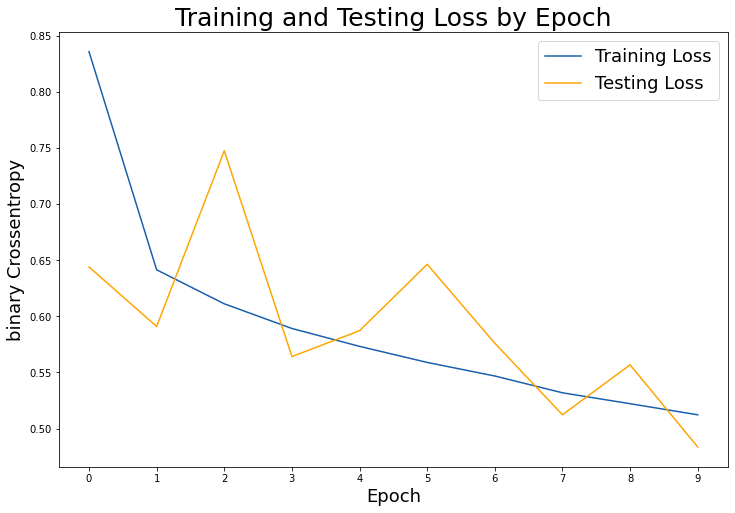

In [111]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('binary Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

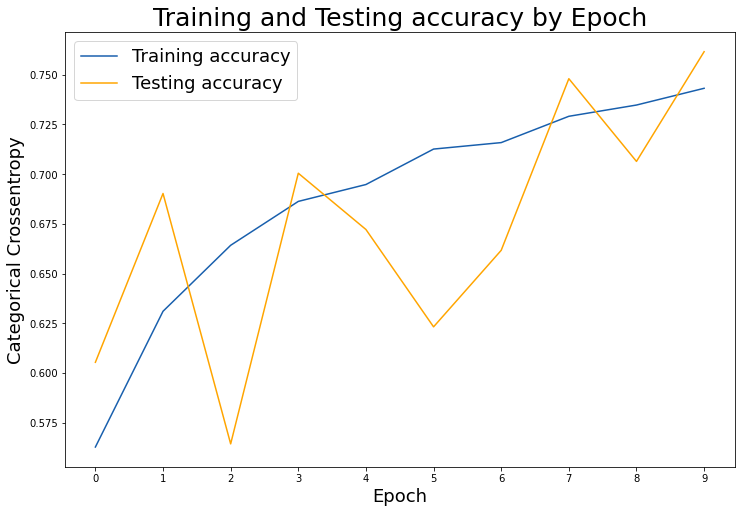

In [112]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training accuracy', color='#185fad')
plt.plot(test_acc, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);